Install module

In [74]:
!{sys.executable} -m pip install pathlib2

In [75]:
import sys
!{sys.executable} -m pip install smartnoise-sql

In [76]:
!{sys.executable} -m pip install psycopg2-binary

In [481]:
privacy = Privacy(epsilon=0.01, delta=0.01)
meta_path = '/Users/kiringodhwani/Desktop/PUMS.yaml'

pumsdb = psycopg2.connect(user='postgres', host='localhost', database='ChicagoPolice')
reader = snsql.from_connection(pumsdb, privacy=privacy, metadata=meta_path)

#result = reader.execute('SELECT dac.category, COUNT(*) FROM public.data_allegation as da, public.data_allegationcategory as dac WHERE da.most_common_category_id = dac.id AND da.incident_date >= "2012-01-01" GROUP BY dac.category;')
#result = reader.execute('SELECT EXTRACT(year FROM incident_date) AS year, COUNT(*) AS number_of_incidents FROM public.lawsuit_lawsuit GROUP BY year')
#result = reader.execute("SELECT COUNT(*) FROM data_officer WHERE race NOT IN ('White', 'Unknown') AND appointed_date BETWEEN '2000-01-01' AND '2009-12-31';")
result = reader.execute("SELECT (SUM(CASE WHEN race = 'White' THEN 1 ELSE 0 END) / CAST(SUM(CASE WHEN race NOT IN ('White', 'Unknown') THEN 1 ELSE 0 END) AS float)) AS percent_poc FROM data_officer WHERE appointed_date > '2010-01-01';")
print(result)

result[1][0]

ValueError: We don't support aggregation over expressions: SUM ( CASE WHEN data_officer.race = 'White' THEN 1 ELSE  0 END )

ERROR CALCULATIONS FOR QUERIES 1,2,4,5,7,8

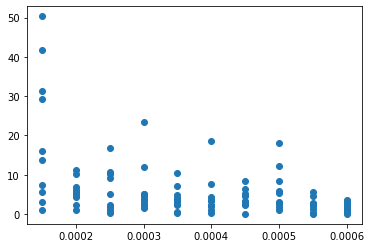

In [554]:
import snsql
from snsql import Privacy
import psycopg2
import matplotlib.pyplot as mpl
import numpy as np

# QUERY 1
#epsilons = np.arange(0.003,0.013,0.001)
#actual_value = 2437
#epsilons = np.array([0.006])

# QUERY 2
#epsilons = np.arange(0.002,0.012,0.001)
#actual_value = 4863

# QUERY 4
#epsilons = np.arange(0.002,0.012,0.001)
#actual_value = 3091

# QUERY 5
#epsilons = np.arange(0.002,0.012,0.001)
#actual_value = 5419

# QUERY 7
#epsilons = np.arange(0.0001,0.0002, 0.00001)
#actual_value = 94727

# QUERY 8
epsilons = np.arange(0.00015,0.00065, 0.00005)
actual_value = 55780

x_axis_of_epsilons = []
errors = []
for i in epsilons:
    for j in range(10):
        privacy = Privacy(epsilon=i, delta=0)
        meta_path = '/Users/kiringodhwani/Desktop/PUMS.yaml'

        pumsdb = psycopg2.connect(user='postgres', host='localhost', database='ChicagoPolice')
        reader = snsql.from_connection(pumsdb, privacy=privacy, metadata=meta_path)
        
        # QUERY 1
        #result = reader.execute("SELECT COUNT(*) FROM data_officer WHERE race NOT IN ('White', 'Unknown') AND appointed_date BETWEEN '2000-01-01' AND '2009-12-31';")
        
        # QUERY 2
        #result = reader.execute("SELECT COUNT(id) FROM data_officer WHERE race != 'Unknown' AND appointed_date BETWEEN '2000-01-01' AND '2009-12-31';")
        
        # QUERY 4
        #result = reader.execute("SELECT COUNT(*) FROM data_officer WHERE race NOT IN ('White', 'Unknown') AND appointed_date >= '2010-01-01';")
        
        # QUERY 5
        #result = reader.execute("SELECT COUNT(*) FROM data_officer WHERE race != 'Unknown' AND appointed_date >= '2010-01-01';")
        
        # QUERY 7
        #result = reader.execute("SELECT COUNT(*) FROM data_allegation WHERE incident_date BETWEEN '2000-01-01' AND '2009-12-31';")
        
        # QUERY 8
        result = reader.execute("SELECT COUNT(*) FROM data_allegation WHERE incident_date >= '2010-01-01';")
        
        noised_ans = result[1][0]
        percent_error = (abs(noised_ans - actual_value) / actual_value) * 100
        
        x_axis_of_epsilons.append(i)
        errors.append(percent_error)

mpl.scatter(x_axis_of_epsilons, errors)


RUNTIME CALCULATIONS FOR QUERIES 1,2,4,5,7,8

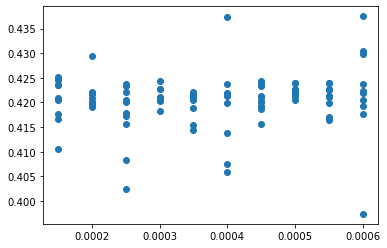

In [438]:
import time

# QUERY 1
#epsilons = np.arange(0.003,0.013,0.001)
#actual_value = 2437

# QUERY 2
#epsilons = np.arange(0.002,0.012,0.001)
#actual_value = 4863

# QUERY 4
#epsilons = np.arange(0.002,0.012,0.001)
#actual_value = 3091

# QUERY 5
#epsilons = np.arange(0.002,0.012,0.001)
#actual_value = 5419

# QUERY 7
#epsilons = np.arange(0.0001,0.0002, 0.00001)
#actual_value = 94727

# QUERY 8
epsilons = np.arange(0.00015,0.00065, 0.00005)
actual_value = 55780


privacy = Privacy(epsilon=i, delta=0)
meta_path = '/Users/kiringodhwani/Desktop/PUMS.yaml'

pumsdb = psycopg2.connect(user='postgres', host='localhost', database='ChicagoPolice')
reader = snsql.from_connection(pumsdb, privacy=privacy, metadata=meta_path)
        
start = time.time()
        
# QUERY 1
#result = reader.execute("SELECT COUNT(*) FROM data_officer WHERE race NOT IN ('White', 'Unknown') AND appointed_date BETWEEN '2000-01-01' AND '2009-12-31';")

# QUERY 2
#result = reader.execute("SELECT COUNT(id) FROM data_officer WHERE race != 'Unknown' AND appointed_date BETWEEN '2000-01-01' AND '2009-12-31';")
   
# QUERY 4
#result = reader.execute("SELECT COUNT(*) FROM data_officer WHERE race NOT IN ('White', 'Unknown') AND appointed_date >= '2010-01-01';")

# QUERY 5
#result = reader.execute("SELECT COUNT(*) FROM data_officer WHERE race != 'Unknown' AND appointed_date >= '2010-01-01';")

# QUERY 7
#result = reader.execute("SELECT COUNT(*) FROM data_allegation WHERE incident_date BETWEEN '2000-01-01' AND '2009-12-31';")

# QUERY 8
result = reader.execute("SELECT COUNT(*) FROM data_allegation WHERE incident_date >= '2010-01-01';")

x_axis_of_epsilons = []
runtimes = []
for i in epsilons:
    for j in range(10):
        privacy = Privacy(epsilon=i, delta=0)
        meta_path = '/Users/kiringodhwani/Desktop/PUMS.yaml'

        pumsdb = psycopg2.connect(user='postgres', host='localhost', database='ChicagoPolice')
        reader = snsql.from_connection(pumsdb, privacy=privacy, metadata=meta_path)
        
        start = time.time()
        
        # QUERY 1
        #result = reader.execute("SELECT COUNT(*) FROM data_officer WHERE race NOT IN ('White', 'Unknown') AND appointed_date BETWEEN '2000-01-01' AND '2009-12-31';")

        # QUERY 2
        #result = reader.execute("SELECT COUNT(id) FROM data_officer WHERE race != 'Unknown' AND appointed_date BETWEEN '2000-01-01' AND '2009-12-31';")
        
        # QUERY 4
        result = reader.execute("SELECT COUNT(*) FROM data_officer WHERE race NOT IN ('White', 'Unknown') AND appointed_date >= '2010-01-01';")

        # QUERY 5
        #result = reader.execute("SELECT COUNT(*) FROM data_officer WHERE race != 'Unknown' AND appointed_date >= '2010-01-01';")
        
        # QUERY 7
        #result = reader.execute("SELECT COUNT(*) FROM data_allegation WHERE incident_date BETWEEN '2000-01-01' AND '2009-12-31';")
        
        # QUERY 8
        result = reader.execute("SELECT COUNT(*) FROM data_allegation WHERE incident_date >= '2010-01-01';")
        
        end = time.time()
        elapsed = end - start
        x_axis_of_epsilons.append(i)
        runtimes.append(elapsed)

mpl.scatter(x_axis_of_epsilons, runtimes)



ERROR CALCULATIONS FOR QUERIES 3 AND 6

[0.7219730941704036, 0.5969055374592834, 0.47774216524216523, 0.5288874215912842, 0.5129249291784702, 0.5750350631136045, 0.6037969459347916, 0.5551755175517552, 0.5346270251023678, 0.4408453143945955]


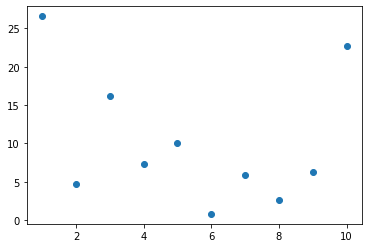

In [539]:
# QUERIES 1 and 2
#epsilon1 = 0.006
#epsilon2 = 0.003
#actual_value = 0.501234

# QUERIES 4 and 5
epsilon4 = 0.005
epsilon5 = 0.003
actual_value = 0.5704

poc_counts = []
total_counts = []

for j in range(10):
    privacy = Privacy(epsilon=epsilon1, delta=0)
    meta_path = '/Users/kiringodhwani/Desktop/PUMS.yaml'

    pumsdb = psycopg2.connect(user='postgres', host='localhost', database='ChicagoPolice')
    reader = snsql.from_connection(pumsdb, privacy=privacy, metadata=meta_path)
        
    # Query 1
    #result1 = reader.execute("SELECT COUNT(*) FROM data_officer WHERE race NOT IN ('White', 'Unknown') AND appointed_date BETWEEN '2000-01-01' AND '2009-12-31';")
    
    # QUERY 4
    result1 = reader.execute("SELECT COUNT(*) FROM data_officer WHERE race NOT IN ('White', 'Unknown') AND appointed_date >= '2010-01-01';")

    poc_counts.append(result1[1][0])


for j in range(10):
    privacy = Privacy(epsilon=epsilon2, delta=0.01)
    meta_path = '/Users/kiringodhwani/Desktop/PUMS.yaml'

    pumsdb = psycopg2.connect(user='postgres', host='localhost', database='ChicagoPolice')
    reader = snsql.from_connection(pumsdb, privacy=privacy, metadata=meta_path)
        
    # Query 2
    #result2 = reader.execute("SELECT COUNT(id) FROM data_officer WHERE race != 'Unknown' AND appointed_date BETWEEN '2000-01-01' AND '2009-12-31';")
    
    # QUERY 5
    result2 = reader.execute("SELECT COUNT(*) FROM data_officer WHERE race != 'Unknown' AND appointed_date >= '2010-01-01';")
    
    total_counts.append(result2[1][0])


# Calculate the noised percentages from the results of the noised queries.
noised_percentages = [x / y for x, y in zip(poc_counts, total_counts)]
print(noised_percentages)

percent_errors = list(map(lambda x: (abs(x - actual_value) / actual_value) * 100, noised_percentages))

mpl.scatter(range(1,11), percent_errors)